# Machine Learning Third Term Final Exam

# Camilo Andrés Romero Maldonado
# **Email** camiloa.romero@correo.usa.edu.co
# **CC** 1020844233

## Required Imports & General Configurations ⚙️

In [254]:
import numpy as np
import matplotlib.pyplot as plt


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

from google.colab import drive
import json


import tensorflow as tf
from tensorflow import keras
from scipy.io import loadmat

## Drive mounting 📀

In [255]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Pretty print dictionaries function 🖨

In [256]:
def printDict(d):
    print(json.dumps(d,sort_keys=True, indent=4, skipkeys=True))

## Setting figures size 👣

In [257]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 6
fig_size[1] = 2

# Dataset Mnist 💾


## Initial exploration & split between training and test 🗺🕵🏽‍♂️

### Dataset reading & exploration 🤓📚

Dataset loading with the loadmat method from scipy.io library. This method stores the information in a dictionary 📕

In [258]:
dataset = loadmat('/content/drive/MyDrive/ML/Tercer Corte/mnist-original.mat')

dataset

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sun Mar 30 03:19:02 2014',
 '__version__': '1.0',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'label': array([[0., 0., 0., ..., 9., 9., 9.]]),
 'mldata_descr_ordering': array([[array(['label'], dtype='<U5'), array(['data'], dtype='<U4')]],
       dtype=object)}

Listing of dataset's keys 🔑 

In [259]:
list(dataset)

['__header__',
 '__version__',
 '__globals__',
 'mldata_descr_ordering',
 'data',
 'label']

Amount of keys in the dataset #🔑📕

In [260]:
len(dataset)

6

### Split between training and test 🏋🏽‍♂️🧪
Usage of train_test_split function to obtain the train and test sub-datasets

In [261]:
X_train, X_test, y_train, y_test = train_test_split(dataset['data'].T, dataset['label'][0], test_size=0.3)

Checking one of the images present in the dataset 🔎🌌

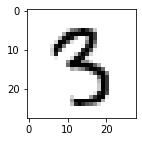

In [262]:
img =X_train[2222].reshape(28,28)
plt.imshow(img, cmap="binary")
plt.show()

## Pipeline Definitions 📝

This pipelines will be used further for the keras' neural networks

In [263]:
train_pipeline = Pipeline([('scaler', MinMaxScaler())])
trained_X_train = pipeline.fit_transform(X_train[2000:3500])

test_pipeline = Pipeline([('scaler', MinMaxScaler())])
trained_X_test = pipeline.fit_transform(X_test[2000:3500])

## Selection and Evaluation of models 🔎 ✅

### Utility functions 🧰

#### Training by classifier function 🚀

Function to fit by classifier and return results based on K-Fold Cross Validation

Its objective is to reduce code duplication (Stay DRY) and it returns a dictionary with the results of:

* Mean
* Standard Deviation
* Results of each iteration at the cross validation
* Accuracy Score

In [278]:
def train_by_classifier(clf, X_train, y_train, X_test, y_test):
    
    cvs = cross_val_score(clf, X_train[2000:3500], y_train[2000:3500], cv=10)
    fit = clf.fit(X_train[2000:3500], y_train[2000:3500])
    
    y_predict = clf.predict(X_test[2000:3500])
    accuracy = accuracy_score(y_test[2000:3500], y_predict)
    
    results = {
        'Mean': np.mean(cvs),
        'STD Deviation': np.std(cvs),
        'Accuracy': accuracy,
    }

    return results

#### Adjust Hyperparams 🔩🔧

Function to get hyperparams by grid params.

Its objective is to reduce code duplication (Stay DRY) and it returns the best params from the ones received.

In [279]:
def adjust_hyperparams(grid_params,clf,X_train,y_train):
   
    gs = GridSearchCV(clf,grid_params,cv=10)

    gs.fit(X_train[2000:3500], y_train[2000:3500])
    
    return gs.best_params_

### Evaluation 🏃🏽‍♂️ and Hyperparams adjustment 🔧

#### Classifiers & grid_params definitions for all classifiers apart from keras ☑️

Auxiliary dictionaries that will help to reduce code duplication (Stay DRY)

In [280]:
classifiers_dict = {
    'Logistic Regression': LogisticRegression(),
    'Support Vectors': SVC(),
    'Random Forest': RandomForestClassifier(),
    'SKNN': MLPClassifier(),
}

grid_params_dict = {
    'Logistic Regression': [{ 'penalty':['l1', 'l2', 'elasticnet'], 'C' : [0.001, 0.1,10]}],
    'Support Vectors': [{ 'kernel':['linear', 'poly', 'rbf', 'sigmoid']}],
    'Random Forest': [{ 'criterion':['gini', 'entropy'],'n_estimators':[3,15,100], 'max_samples' :[2,5,10,None]}],
    'SKNN': [{ 'activation':['relu', 'logistic'], 'hidden_layer_sizes':[3,5,15,100], 'max_iter':[10,100,200,10000]}],
}

models_results_dict = {}
best_hyperparams_dict = {}

For loop that executes all the models and gets the best hyperparams for each model for fasting up the process

In [281]:
for clf in classifiers_dict:
    print(clf)
    models_results_dict[clf] = train_by_classifier(classifiers_dict[clf], X_train, y_train, X_test, y_test)
    best_hyperparams_dict[clf] = adjust_hyperparams(grid_params_dict[clf], classifiers_dict[clf], X_train, y_train)

Logistic Regression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Support Vectors
Random Forest
SKNN


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

Results obtained from each model stored in a dictionary for better comprehension

In [282]:
printDict(models_results_dict)

{
    "Logistic Regression": {
        "Accuracy": 0.852,
        "Mean": 0.8526666666666667,
        "STD Deviation": 0.026238224872205885
    },
    "Random Forest": {
        "Accuracy": 0.9113333333333333,
        "Mean": 0.9053333333333333,
        "STD Deviation": 0.014544949486180962
    },
    "SKNN": {
        "Accuracy": 0.84,
        "Mean": 0.8166666666666668,
        "STD Deviation": 0.023897931105246562
    },
    "Support Vectors": {
        "Accuracy": 0.9313333333333333,
        "Mean": 0.9266666666666665,
        "STD Deviation": 0.025121924908555693
    }
}


Results obtained from the hyperparams adjustment. It is important to use the values stored in this dictionary as the hyperparams in the final evaluation because they will give the best results.

In [283]:
printDict(best_hyperparams_dict)

{
    "Logistic Regression": {
        "C": 0.001,
        "penalty": "l2"
    },
    "Random Forest": {
        "criterion": "gini",
        "max_samples": null,
        "n_estimators": 100
    },
    "SKNN": {
        "activation": "logistic",
        "hidden_layer_sizes": 100,
        "max_iter": 200
    },
    "Support Vectors": {
        "kernel": "rbf"
    }
}


### Keras Evaluation 🧠

In [284]:
keras_model = keras.Sequential()

keras_model.add(keras.layers.Flatten(input_shape=(28,28), name='input')) 

keras_model.add(keras.layers.Dense(300, activation='relu', name='hidden1')) 
keras_model.add(keras.layers.Dense(100, activation='relu', name='hidden2')) 

keras_model.add(keras.layers.Dense(10, activation='softmax', name='output')) 

keras_model.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics='accuracy')

In [285]:
keras_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Flatten)              (None, 784)               0         
_________________________________________________________________
hidden1 (Dense)              (None, 300)               235500    
_________________________________________________________________
hidden2 (Dense)              (None, 100)               30100     
_________________________________________________________________
output (Dense)               (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [286]:
keras_model.fit(trained_X_train, y_train[2000:3500], validation_split=0.3, epochs=15)

Epoch 1/15
33/33 [==============================] - 1s 9ms/step - loss: 1.2646 - accuracy: 0.6295 - val_loss: 0.6303 - val_accuracy: 0.8044
Epoch 2/15
33/33 [==============================] - 0s 4ms/step - loss: 0.4183 - accuracy: 0.8857 - val_loss: 0.4667 - val_accuracy: 0.8622
Epoch 3/15
33/33 [==============================] - 0s 4ms/step - loss: 0.2399 - accuracy: 0.9362 - val_loss: 0.4211 - val_accuracy: 0.8667
Epoch 4/15
33/33 [==============================] - 0s 4ms/step - loss: 0.1587 - accuracy: 0.9648 - val_loss: 0.3933 - val_accuracy: 0.8911
Epoch 5/15
33/33 [==============================] - 0s 5ms/step - loss: 0.0928 - accuracy: 0.9838 - val_loss: 0.3895 - val_accuracy: 0.8800
Epoch 6/15
33/33 [==============================] - 0s 4ms/step - loss: 0.0600 - accuracy: 0.9943 - val_loss: 0.4114 - val_accuracy: 0.8889
Epoch 7/15
33/33 [==============================] - 0s 4ms/step - loss: 0.0399 - accuracy: 0.9962 - val_loss: 0.4199 - val_accuracy: 0.8778
Epoch 8/15
33/33 [==

In [287]:
keras_model.evaluate(trained_X_test, y_test[2000:3500])

47/47 [==============================] - 0s 2ms/step - loss: 0.4182 - accuracy: 0.8993


[0.4182068407535553, 0.8993333578109741]

## Final Evaluation 🎲

It is important to use the hyperparams found in the best_hyperparams_dict dictionary in order to obtain better results

In [292]:
classifiers_dict = {
    'Logistic Regression': LogisticRegression(C=0.001, penalty= 'l2'),
    'Support Vectors': SVC(kernel ='rbf'),
    'Random Forest': RandomForestClassifier(criterion='gini', max_samples=None, n_estimators=100),
    'SKNN': MLPClassifier(activation='logistic', hidden_layer_sizes=100, max_iter=200),
}

best_models_results_dict = {}


for clf in classifiers_dict:
    print(clf)
    best_models_results_dict[clf] = train_by_classifier(classifiers_dict[clf], X_train, y_train, X_test, y_test)


Logistic Regression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Support Vectors
Random Forest
SKNN


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [293]:
printDict(best_models_results_dict)

{
    "Logistic Regression": {
        "Accuracy": 0.8566666666666667,
        "Mean": 0.852,
        "STD Deviation": 0.02286190426597632
    },
    "Random Forest": {
        "Accuracy": 0.916,
        "Mean": 0.9073333333333334,
        "STD Deviation": 0.020965580258021876
    },
    "SKNN": {
        "Accuracy": 0.8966666666666666,
        "Mean": 0.8813333333333334,
        "STD Deviation": 0.025086516962969027
    },
    "Support Vectors": {
        "Accuracy": 0.9313333333333333,
        "Mean": 0.9266666666666665,
        "STD Deviation": 0.025121924908555693
    }
}


## Final Analysis 🧐

In [294]:
printDict(models_results_dict)

{
    "Logistic Regression": {
        "Accuracy": 0.852,
        "Mean": 0.8526666666666667,
        "STD Deviation": 0.026238224872205885
    },
    "Random Forest": {
        "Accuracy": 0.9113333333333333,
        "Mean": 0.9053333333333333,
        "STD Deviation": 0.014544949486180962
    },
    "SKNN": {
        "Accuracy": 0.84,
        "Mean": 0.8166666666666668,
        "STD Deviation": 0.023897931105246562
    },
    "Support Vectors": {
        "Accuracy": 0.9313333333333333,
        "Mean": 0.9266666666666665,
        "STD Deviation": 0.025121924908555693
    }
}


In [296]:
printDict(best_models_results_dict)

{
    "Logistic Regression": {
        "Accuracy": 0.8566666666666667,
        "Mean": 0.852,
        "STD Deviation": 0.02286190426597632
    },
    "Random Forest": {
        "Accuracy": 0.916,
        "Mean": 0.9073333333333334,
        "STD Deviation": 0.020965580258021876
    },
    "SKNN": {
        "Accuracy": 0.8966666666666666,
        "Mean": 0.8813333333333334,
        "STD Deviation": 0.025086516962969027
    },
    "Support Vectors": {
        "Accuracy": 0.9313333333333333,
        "Mean": 0.9266666666666665,
        "STD Deviation": 0.025121924908555693
    }
}


Accuracies dictionaries comparison between the ones obtained without adjusting hyperparams and the others that do adjust them. It is important to know that the keras' accuracies are obtained from the previous evaluation results, but as known, in keras no hyperparams can be set up, so both values are considered to be the same.

In [304]:
accuracies_dict = {}
best_accuracies_dict = {}

for clf in best_models_results_dict:
    accuracies_dict[clf] = models_results_dict[clf]['Accuracy']
    best_accuracies_dict[clf] = best_models_results_dict[clf]['Accuracy']
accuracies_dict['KerasNN'] = 0.8993
best_accuracies_dict['KerasNN'] = 0.8993

print('Accuracies\n')
printDict(accuracies_dict)
print('\nBest Accuracies\n')
printDict(best_accuracies_dict)

Accuracies

{
    "KerasNN": 0.8993,
    "Logistic Regression": 0.852,
    "Random Forest": 0.9113333333333333,
    "SKNN": 0.84,
    "Support Vectors": 0.9313333333333333
}

Best Accuracies

{
    "KerasNN": 0.8993,
    "Logistic Regression": 0.8566666666666667,
    "Random Forest": 0.916,
    "SKNN": 0.8966666666666666,
    "Support Vectors": 0.9313333333333333
}


As expected, the results obtained by adjusting the hyperparameters were better than the ones obtained by using the default hyperparameters. The only one with different results was the Support Vectors model because it only was used the kernel parameter and the best kernel option matched the default value.

## Final Observation 👀

A correct hyperparameter adjustment and analysis will have a positive impact on the prediction of the model. However, if at the moment of adjusting the hyperparameters, the default value is excluded, the results could be altered and have an even worse result from the obtained first.

Is important to know that for a fast and accurate prediction, Keras' neural network model can be a good model to choose that can take you out of a hurry. However, the model with the highest accuracy score obtained were the support vectors.

With the hyperparams adjustment, all models have good predictions and can be considerable in any situation. However, as it was said before, the best ones are the Support Vectors and the Keras' Neural Networks.